In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
x = pd.read_csv("C:/Users/USER/Documents/Machine_Learning_Algorithms/Datasets/titanic.csv")
x

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Preprocess and split the data

le=preprocessing.LabelEncoder()
x["Sex"]=le.fit_transform(x["Sex"])
x["Sex"].unique()

x.isnull().sum()

x['Age'].fillna(x['Age'].median(), inplace=True)

x = x.drop(["Name", "Ticket", "Cabin", "Embarked"], axis=1)

X=x.drop(['Survived'],axis=1)
y=x['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Best parameters:  {'C': 1, 'max_iter': 500, 'penalty': 'l2'}
Accuracy on test data:  0.8100558659217877
Mean squared error: 0.18994413407821228
Mean absolute error: 0.18994413407821228
Root Mean squared error: 0.43582580703557733
Accuracy: 0.8100558659217877


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Value

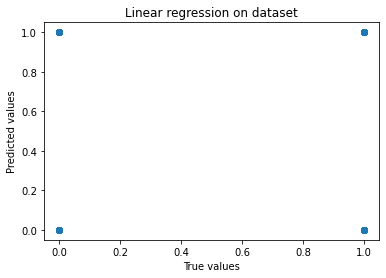

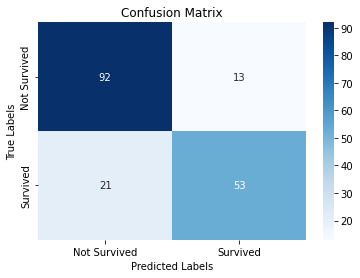

TruePositive: 53
TrueNegative: 92
Accuracy: 0.8100558659217877


In [12]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
# Set up the logistic regression model and parameter grid for grid search
lr_model = LogisticRegression(random_state=42)
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [100, 250, 500, 1000]
}

# Set up the GridSearchCV object
grid_search = GridSearchCV(lr_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the accuracy score on the testing data
print("Best parameters: ", grid_search.best_params_)
print("Accuracy on test data: ", grid_search.score(X_test, y_test))

# Get the predicted classes for the testing data
y_pred = grid_search.predict(X_test)
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
accuracy= accuracy_score(y_test, y_pred)

print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Root Mean squared error:", rmse)
print("Accuracy:", accuracy)


import matplotlib.pyplot as plt

# Plot the predicted values against the true values
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Linear regression on dataset")
plt.show()

y_pred_binary = np.round(y_pred)


import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)


# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

from sklearn.metrics import confusion_matrix

# Assuming we have predicted labels y_pred and actual labels y_true
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()

# True Positive (TP): Predicted 1 and Actual 1
tp = tp

# True Negative (TN): Predicted 0 and Actual 0
tn = tn

# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f'TruePositive: {tp}')
print(f'TrueNegative: {tn}')
print(f'Accuracy: {accuracy}')
